In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Preprocessing

In [2]:
df = pd.read_csv("../data/curated/income_person.csv")
df = df.iloc[1: , :]

df2 = pd.read_csv("../data/curated/houseprice.csv")
df2.iloc[1: , :]
df2 = df2.iloc[1: , :]
df2.reset_index(drop=True, inplace=True)

In [3]:
# check noisy data
for i in range(1, len(df)):
    if df["2018income"][i] == ' np ':
        print(i)
for i in range(1, len(df)):
    if df["2017income"][i] == ' np ':
        print(i)
for i in range(1, len(df)):
    if df["2016income"][i] == ' np ':
        print(i)
for i in range(1, len(df)):
    if df["2015income"][i] == ' np ':
        print(i)
for i in range(1, len(df)):
    if df["2014income"][i] == ' np ':
        print(i)

83
83
83
80
83
92
127
194
236
80
83
92
127
194
236


In [4]:
# remove noises in income
update_df = df.drop([df.index[80], df.index[83], df.index[92], df.index[127], df.index[194], df.index[236]])

In [5]:
update_df.reset_index(drop=True, inplace=True)

In [6]:
for i in range(len(update_df)):
    if update_df["2018income"][i] == ' np ':
        print(i)
for i in range(len(update_df)):
    if update_df["2017income"][i] == ' np ':
        print(i)
for i in range(len(update_df)):
    if update_df["2016income"][i] == ' np ':
        print(i)
for i in range(len(update_df)):
    if update_df["2015income"][i] == ' np ':
        print(i)
for i in range(len(update_df)):
    if update_df["2014income"][i] == ' np ':
        print(i)

81
81
81
79
81
89
123
189
230
79
81
89
123
189
230


In [7]:
update_df = update_df.drop([update_df.index[81], update_df.index[79], update_df.index[89], update_df.index[123], update_df.index[189], update_df.index[230]])

In [8]:
update_df.reset_index(drop=True, inplace=True)

In [10]:
# remove character in string
for i in range(0, len(update_df)):
    s = update_df["2014income"][i]
    new = s.replace(',', '')
    new = new.replace(' ', '')
    update_df["2014income"][i] = new
for i in range(0, len(update_df)):
    s = update_df["2015income"][i]
    new = s.replace(',', '')
    new = new.replace(' ', '')
    update_df["2015income"][i] = new
for i in range(0, len(update_df)):
    s = update_df["2016income"][i]
    new = s.replace(',', '')
    new = new.replace(' ', '')
    update_df["2016income"][i] = new
for i in range(0, len(update_df)):
    s = update_df["2017income"][i]
    new = s.replace(',', '')
    new = new.replace(' ', '')
    update_df["2017income"][i] = new
for i in range(0, len(update_df)):
    s = update_df["2018income"][i]
    new = s.replace(',', '')
    new = new.replace(' ', '')
    update_df["2018income"][i] = new

/var/folders/hc/bk1ztr7n3735c7xpl5j8qqvr0000gn/T/ipykernel_31990/412664951.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_df["2014income"][i] = new
/var/folders/hc/bk1ztr7n3735c7xpl5j8qqvr0000gn/T/ipykernel_31990/412664951.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_df["2015income"][i] = new
/var/folders/hc/bk1ztr7n3735c7xpl5j8qqvr0000gn/T/ipykernel_31990/412664951.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [11]:
# convert string to numeric data for income and house price
update_df['2017income'] = pd.to_numeric(update_df['2017income'])
update_df['2018income'] = pd.to_numeric(update_df['2018income'])
update_df['2016income'] = pd.to_numeric(update_df['2016income'])
update_df['2015income'] = pd.to_numeric(update_df['2015income'])
update_df['2014income'] = pd.to_numeric(update_df['2014income'])

df2['2017'] = pd.to_numeric(df2['2017'])
df2['2018'] = pd.to_numeric(df2['2018'])
df2['2016'] = pd.to_numeric(df2['2016'])
df2['2015'] = pd.to_numeric(df2['2015'])
df2['2019'] = pd.to_numeric(df2['2019'])

In [12]:
df2.dropna(how='any', axis=1, inplace=True)

Prediction

In [13]:
# create empty list to store predicted values for income
l19 = []
l20 = []
l21 = []
l22 = []
l23 = []
l24 = []
l25 = []

# create empty list to store predicted values for house price
ll20 = []
ll21 = []
ll22 = []
ll23 = []
ll24 = []
ll25 = []

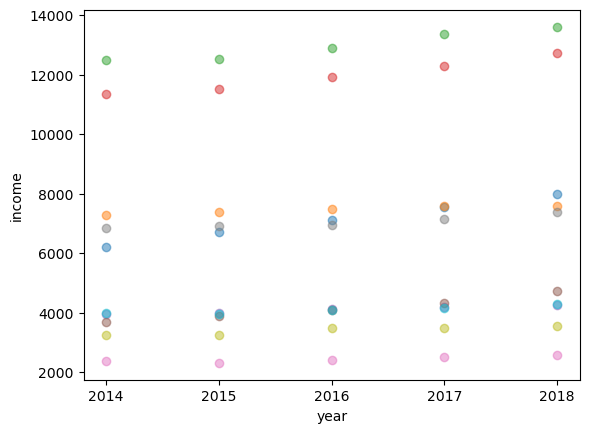

In [15]:
# plot the relationship between income and year
for i in range(10):
    df1 = pd.DataFrame(data=[['2014', update_df.iloc[i,2]],
                        ['2015', update_df.iloc[i,3]],
                        ['2016', update_df.iloc[i,4]],
                        ['2017', update_df.iloc[i,5]],
                        ['2018', update_df.iloc[i,6]]],
                 columns = ['year','income'],
                 )
    y = df1['income']
    x = df1['year']
    plt.scatter(x, y, alpha=0.5)
plt.xlabel('year')
plt.ylabel('income')
plt.savefig("../plots/income vs. year.png")
plt.show()

From above scatter plots, it is evidence that as the year increases, the income increases.

In [16]:
# iterate over all suburb's income according to year
for i in range(len(update_df)):
    df1 = pd.DataFrame(data=[['2014', update_df.iloc[i,2]],
                        ['2015', update_df.iloc[i,3]],
                        ['2016', update_df.iloc[i,4]],
                        ['2017', update_df.iloc[i,5]],
                        ['2018', update_df.iloc[i,6]]],
                 columns = ['year','income'],
                 )
    y = df1['income']
    x = df1['year']
    x = x.values.reshape(-1,1)
    y = y.values.reshape(-1,1)
    
    # perform linear regression to predict future year's income for each suburb
    model = LinearRegression()
    model.fit(x, y)
    predict_y = model.predict(x)
    X2 = [[2019],[2020],[2021],[2022],[2023],[2024],[2025]]
    Y2 = model.predict(X2)
    
    # append values to each list
    l19.append(Y2[0][0])
    l20.append(Y2[1][0])
    l21.append(Y2[2][0])
    l22.append(Y2[3][0])
    l23.append(Y2[4][0])
    l24.append(Y2[5][0])
    l25.append(Y2[6][0])

# iterate over all suburb's unit house price according to year
for i in range(len(df2)):
    df1 = pd.DataFrame(data=[['2015', df2.iloc[i,2]],
                        ['2016', df2.iloc[i,3]],
                        ['2017', df2.iloc[i,4]],
                        ['2018', df2.iloc[i,5]],
                        ['2019', df2.iloc[i,6]]],
                 columns = ['year','price'],
                 )
    y = df1['price']
    x = df1['year']
    x = x.values.reshape(-1,1)
    y = y.values.reshape(-1,1)
    
    # perform linear regression to predict future year's price for each suburb
    model = LinearRegression()
    model.fit(x, y)
    predict_y = model.predict(x)
    X2 = [[2020],[2021],[2022],[2023],[2024],[2025]]
    Y2 = model.predict(X2)
    
    # append values to each list
    ll20.append(Y2[0][0])
    ll21.append(Y2[1][0])
    ll22.append(Y2[2][0])
    ll23.append(Y2[3][0])
    ll24.append(Y2[4][0])
    ll25.append(Y2[5][0])

In [17]:
# update income dataframe with predicted income values
update_df["2019income"] = l19
update_df["2020income"] = l20
update_df["2021income"] = l21
update_df["2022income"] = l22
update_df["2023income"] = l23
update_df["2024income"] = l24
update_df["2025income"] = l25

# update house price dataframe with predicted price values
df2["2020house_price"] = ll20
df2["2021house_price"] = ll21
df2["2022house_price"] = ll22
df2["2023house_price"] = ll23
df2["2024house_price"] = ll24
df2["2025house_price"] = ll25

In [16]:
import os
# ignore it if exists
os.mkdir(r'../data/curated/predictions')


FileExistsError: [Errno 17] File exists: '../data/curated/predictions'

In [18]:
update_df.to_csv("../data/curated/predictions/pred_income.csv")

In [19]:
df2.to_csv("../data/curated/predictions/pred_house_price.csv")